# Zadanie: Fashion-Mnist

## Krok 1

Pierwszym krokiem będzie zaimplementowanie sieci neuronowej na używanym wcześniej zestawie Fashion-Mnist tak, aby uzyskać wynik na danych testowych rzędu accuracy > 0.94 (albo jak najbardziej zbliżony), używając poniższego podziału:

X_train, X_test, y_train, y_test = \
    train_test_split(images, labels, test_size=0.1, random_state=10, stratify=labels)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

from keras.datasets import fashion_mnist

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam

from sklearn.model_selection import train_test_split


train, test = tf.keras.datasets.fashion_mnist.load_data()

images1, labels1 = train
images2, labels2 = test

# I have no idea why it doesn't work:
# images = np.concatenate((images1, images2), axis=0)

# so I had to go around:
X1, X2, X3, X4, X5, X6 = np.split(images1, 6, axis=0)
images = np.concatenate((X1, X2, X3, X4, X5, X6, images2), axis=0)

X1, X2, X3, X4, X5, X6 = np.split(labels1, 6, axis=0)
labels = np.concatenate((X1, X2, X3, X4, X5, X6, labels2), axis=0)

# Pixel normalization
images = images/255.0

# Save as int
labels = labels.astype(np.int32)

In [2]:
# Split test and train data
X_train, X_test, y_train, y_test = \
    train_test_split(images, labels, test_size=0.1, random_state=10, stratify=labels)

In [107]:
# Define the architecture of the model
def model_arch():
    models = Sequential()

    models.add(Conv2D(64, (5, 5),
                      padding="same",
                      activation="relu",
                      input_shape=(28, 28, 1)))
 
    models.add(MaxPooling2D(pool_size=(2, 2)))
    
    models.add(Conv2D(128, (5, 5),
                      padding="same",
                      activation="relu"))
 
    models.add(MaxPooling2D(pool_size=(2, 2)))
    
    models.add(Conv2D(256, (5, 5), 
                      padding="same",
                      activation="relu"))
 
    models.add(MaxPooling2D(pool_size=(2, 2)))
 
    models.add(Flatten())
    
    models.add(Dense(256, activation="relu"))
 
    models.add(Dense(10, activation="softmax"))
    return models

In [6]:
# Model creation and summary
model = model_arch()
 
model.compile(optimizer=Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        1664      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       204928    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 128)         0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 256)         819456    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 3, 3, 256)         0

In [161]:
# Fitting
history = model.fit(
    X_train, y_train,
    epochs=10,
    steps_per_epoch=100,
    validation_split=0.33
)

Epoch 1/10
100/100 [==============================] - 185s 2s/step - loss: 0.7014 - accuracy: 0.7441 - val_loss: 0.4157 - val_accuracy: 0.8521
Epoch 2/10
100/100 [==============================] - 186s 2s/step - loss: 0.3733 - accuracy: 0.8644 - val_loss: 0.3370 - val_accuracy: 0.8790
Epoch 3/10
100/100 [==============================] - 192s 2s/step - loss: 0.3029 - accuracy: 0.8909 - val_loss: 0.3298 - val_accuracy: 0.8781
Epoch 4/10
100/100 [==============================] - 186s 2s/step - loss: 0.2714 - accuracy: 0.9005 - val_loss: 0.2816 - val_accuracy: 0.8984
Epoch 5/10
100/100 [==============================] - 201s 2s/step - loss: 0.2433 - accuracy: 0.9097 - val_loss: 0.2609 - val_accuracy: 0.9041
Epoch 6/10
100/100 [==============================] - 229s 2s/step - loss: 0.2188 - accuracy: 0.9200 - val_loss: 0.2485 - val_accuracy: 0.9098
Epoch 7/10
100/100 [==============================] - 194s 2s/step - loss: 0.1956 - accuracy: 0.9278 - val_loss: 0.2464 - val_accuracy: 0.9109

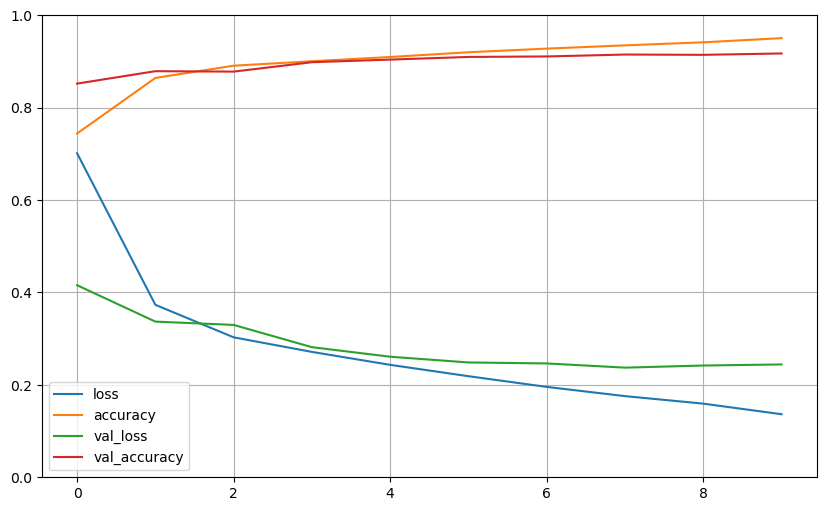

In [162]:
# Performance monitor
pd.DataFrame(history.history).plot(figsize=(10,6))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [165]:
# Evaluate
model.evaluate(X_test, y_test)

219/219 [==============================] - 6s 28ms/step - loss: 0.2225 - accuracy: 0.9226


[0.2225392609834671, 0.9225714206695557]

Overtrained model. But the overall performance is quite good.

## Krok 2

Drugim krokiem będzie zapisanie i dostarczenie modelu oraz napisanie interfejsu, który przyjmuje wartość wejściową oraz zwraca wartość przewidzianą przez nasz model wraz z wyrysowanym obrazem wejściowym (aby można było zweryfikować wizualnie, czy działa).

In [15]:
# Save the model
model.save('./model_0.3.keras', overwrite=True)

In [3]:
# Load the model - just in case
# model = tf.keras.models.load_model('./model_0.3.keras')

In [4]:
# Predictions
y_pred = model.predict(images)

2188/2188 [==============================] - 79s 36ms/step


In [13]:
# Sample prediction
np.argmax(y_pred[69999])

5

In [15]:
# Assign label names
def get_label_name(number):
    label_names = {
        0: "T-shirt/top",
        1: "Trouser",
        2: "Pullover",
        3: "Dress",
        4: "Coat",
        5: "Sandals",
        6: "Shirt",
        7: "Sneaker",
        8: "Bag",
        9: "Ankle Boots",
    }

    # Check if the number is valid and exists in the dictionary
    if number in label_names:
        return label_names[number]
    else:
        return "Unknown"

# Example usage:
label_name = get_label_name(np.argmax(y_pred[69999]))
print(f"Label name for number {np.argmax(y_pred[69999])}: {label_name}")


Label name for number 5: Sandals


In [22]:
# The interface

import PySimpleGUI as sg

from io import BytesIO
from PIL import Image

# Define the layout for the PySimpleGUI window
layout = [
    [sg.Text("Enter a number between 1 and 70000: ")],
    [sg.InputText(key="-NUMBER-")],
    [sg.Button("Show Result"), sg.Button("Exit")],
    [sg.Text("", size=(30, 1), key="-RESULT-")],
    [sg.Image(key="-IMAGE-")],  # To display the image
]

# Create the PySimpleGUI window
window = sg.Window("Number and Image Viewer", layout)

while True:
    event, values = window.read()

    if event == sg.WINDOW_CLOSED or event == "Exit":
        break

    try:
        # Get the user input as an integer
        user_number = int(values["-NUMBER-"])

        # Ensure the user input is within the valid range
        if 1 <= user_number <= 70000:
            # Display the prediction result
            result = np.argmax(y_pred[user_number - 1])
            window["-RESULT-"].update(f"Model prediction: {result} - {get_label_name(result)}")

            # Display the pseudocolor image within the PySimpleGUI window
            if user_number <= len(images):
                data = images[user_number - 1]
                cmap = plt.get_cmap('viridis')
                rgba_data = (cmap(data) * 255).astype(np.uint8)

                # Convert the RGBA data to a PIL Image
                img = Image.fromarray(rgba_data, 'RGBA')
                img = img.resize((400, 400), Image.LANCZOS)

                # Convert PIL Image to bytes for PySimpleGUI display
                img_byte_array = BytesIO()
                img.save(img_byte_array, format="PNG")
                img_byte_array.seek(0)

                # Update the image element
                window["-IMAGE-"].update(data=img_byte_array.read())
            else:
                sg.popup_error("Scalar data not found.")
        else:
            sg.popup_error("Please enter a number between 1 and 70000.")
    except ValueError:
        sg.popup_error("Please enter a valid number.")

window.close()


## Krok 3

Trzecim krokiem będzie podbicie naszego wyniku do około 0.97 poprzez użycie technik augumentacji, czyli tworzenia nowy danych na bazie danych już istniejących.

In [113]:
import albumentations as A

augmented_images_list = []

# Define Albumentations augmentations
augmentations = A.Compose([
    A.RandomRotate90(),
    A.Flip(),
    A.Transpose(),
    A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=15, p=0.5),
    A.RandomBrightnessContrast(p=0.2),
])

def augment_image(image):
    # Ensure the input image data type is uint8 - this was quite a problem for me at first
    image = (image * 255).astype(np.uint8)
    augmented = augmentations(image=image)
    augmented_image = augmented["image"].astype(np.float32) / 255.0  # Convert back to float32
    return augmented_image

num_augmentations = 6  # Define no. of augmentations

for n in range(num_augmentations):
    for image in images:
        augmented_image = augment_image(image)
        augmented_images_list.append(augmented_image)

# Convert into a 3D NumPy array
augmented_images = np.stack(augmented_images_list, axis=0)

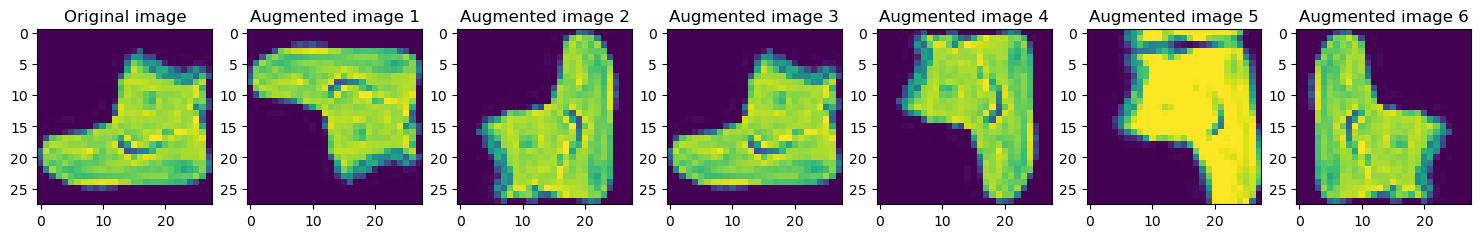

In [131]:
# Sample comparison - pre and post augmentation
fig, axs = plt.subplots(1, num_augmentations+1)

fig.set_size_inches(18.5, 10.5)

axs[0].imshow(images[0])
axs[0].set_title('Original image')

for n in range(num_augmentations):
    axs[n+1].imshow(augmented_images[0+(70000*n)])
    axs[n+1].set_title('Augmented image {}'.format(n+1))

#plt.subplots_adjust(wspace=1.0)

plt.show()

In [138]:
# Join old and new data, and split into test and training
images_fin = np.concatenate((images, augmented_images), axis=0)

labels_fin = np.empty(0,)
for n in range(num_augmentations+1):
    labels_fin = np.concatenate((labels_fin, labels), axis=0)

X_train_fin, X_test_fin, y_train_fin, y_test_fin = \
    train_test_split(images, labels, test_size=0.1, random_state=10, stratify=labels)


In [108]:
# Final model creation
model_fin = model_arch()
 
model_fin.compile(optimizer=Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [141]:
# Fitting final model
history_fin = model_fin.fit(
    X_train_fin, y_train_fin,
    epochs=10,
    steps_per_epoch=100,
    validation_split=0.33
)

Epoch 1/10
100/100 [==============================] - 202s 2s/step - loss: 0.1062 - accuracy: 0.9620 - val_loss: 0.2601 - val_accuracy: 0.9140
Epoch 2/10
100/100 [==============================] - 209s 2s/step - loss: 0.0907 - accuracy: 0.9659 - val_loss: 0.2720 - val_accuracy: 0.9156
Epoch 3/10
100/100 [==============================] - 261s 3s/step - loss: 0.0825 - accuracy: 0.9701 - val_loss: 0.2533 - val_accuracy: 0.9199
Epoch 4/10
100/100 [==============================] - 256s 3s/step - loss: 0.0728 - accuracy: 0.9732 - val_loss: 0.2942 - val_accuracy: 0.9207
Epoch 5/10
100/100 [==============================] - 257s 3s/step - loss: 0.0607 - accuracy: 0.9781 - val_loss: 0.2817 - val_accuracy: 0.9163
Epoch 6/10
100/100 [==============================] - 259s 3s/step - loss: 0.0471 - accuracy: 0.9822 - val_loss: 0.2949 - val_accuracy: 0.9214
Epoch 7/10
100/100 [==============================] - 262s 3s/step - loss: 0.0393 - accuracy: 0.9856 - val_loss: 0.3153 - val_accuracy: 0.9160

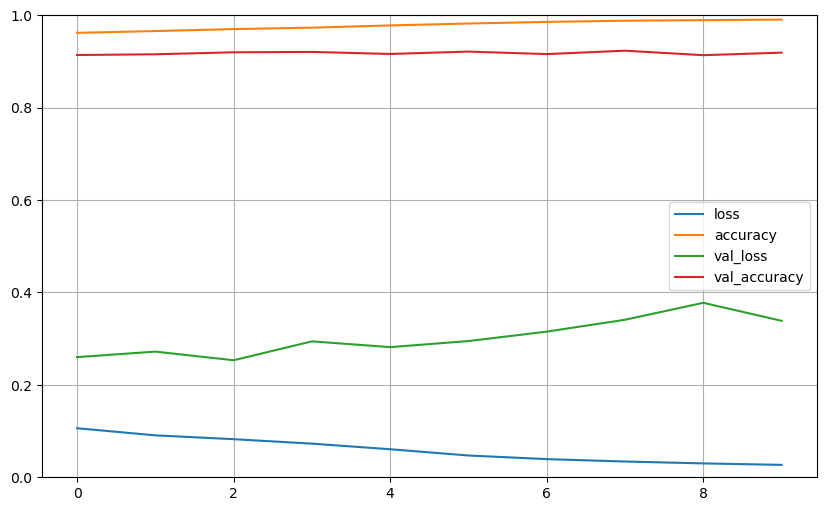

In [142]:
# Performance monitor
pd.DataFrame(history_fin.history).plot(figsize=(10,6))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [143]:
# Evaluate
model_fin.evaluate(X_test_fin, y_test_fin)

219/219 [==============================] - 10s 47ms/step - loss: 0.3174 - accuracy: 0.9246


[0.31743645668029785, 0.9245714545249939]

Overtrained model. But the overall performance is quite good.